<a href="https://colab.research.google.com/github/nguynlb/DataScience/blob/main/recognitionhandnumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognition Handler Number
## 1. Import Dataset

In [2]:
%pwd

'/content'

In [3]:
%ls

sample_data/


In [1]:
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
train_labels.shape

(60000,)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline


2

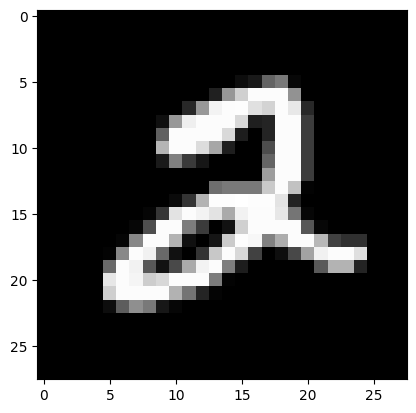

In [17]:
plt.imshow(train_images[5], cmap="gray");
train_labels[5]

In [21]:
import random as rd
rd.randint(3,10)

6

<Axes: >

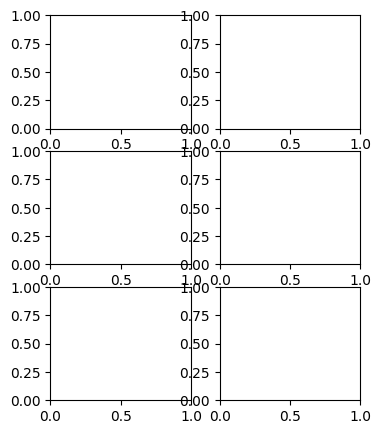

In [26]:
fig, axes = plt.subplots(3,2, figsize=(4,5))
axes[1][1]

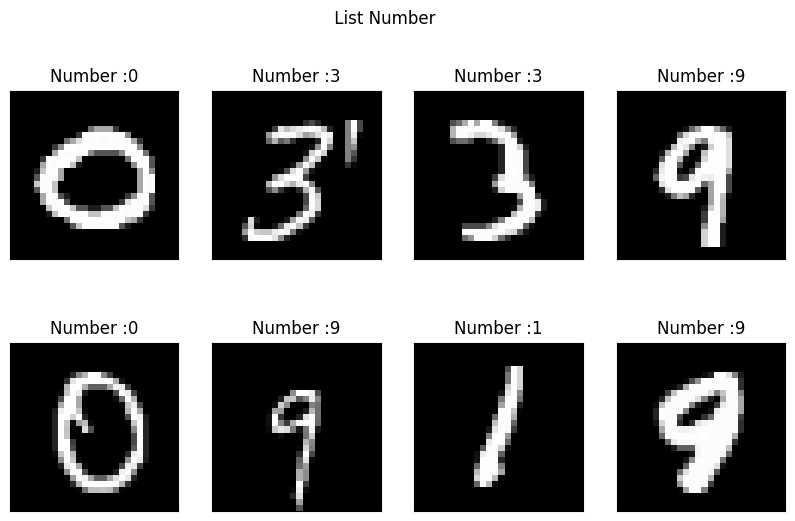

In [35]:
nrow = 2
ncol = 4
size_list_image = train_images.shape[0]
fig, axes = plt.subplots(nrow, ncol, figsize=(10, 6))
for img in range(nrow * ncol):
  rand_image = rd.randint(0, size_list_image)

  ax = axes[img // ncol][img % ncol]
  ax.imshow(train_images[rand_image], cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"Number :{train_labels[rand_image]}")
  
fig.suptitle(" List Number ")
fig.show()

## 2. Preprocessing Data

In [37]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
train_images = train_images.astype("float") / 255.0
test_images = test_images.astype("float") / 255.0

In [40]:
from sklearn.preprocessing import LabelBinarizer

In [48]:
lb = LabelBinarizer()
train_output = lb.fit_transform(train_labels)
test_output = lb.fit_transform(test_labels)